<a href="https://www.kaggle.com/code/hossamahmedsalah/upwork-analyis-of-jobs?scriptVersionId=148096854" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About the Upwork 
>An American freelancing platform headquartered in Santa Clara and San Francisco, California.In March 2022, Upwork was named on Time's list of TIME100 Most Influential Companies of 2022. [wikipedia](https://en.wikipedia.org/wiki/Upwork)

[Annual Report 2022](https://investors.upwork.com/static-files/a8118825-8d1f-49b9-884d-be8be6ad4eb2)⭐
- What is Gross Service Volume (GSV)? ($4.1B in 2022)
>The <strong><mark>total dollar value transacted through Upwork’s platform </mark></strong> is called Gross Services Volume (GSV). GSV includes both client spend and additional fees charged for value-added services. Client spend—the total amount that clients spend on both Upwork’s marketplace offerings and its managed services offering—is the primary component of Upwork’s GSV. GSV also includes additional fees charged by Upwork for other services, such as freelancer withdrawals and foreign currency exchange.

# KPIs
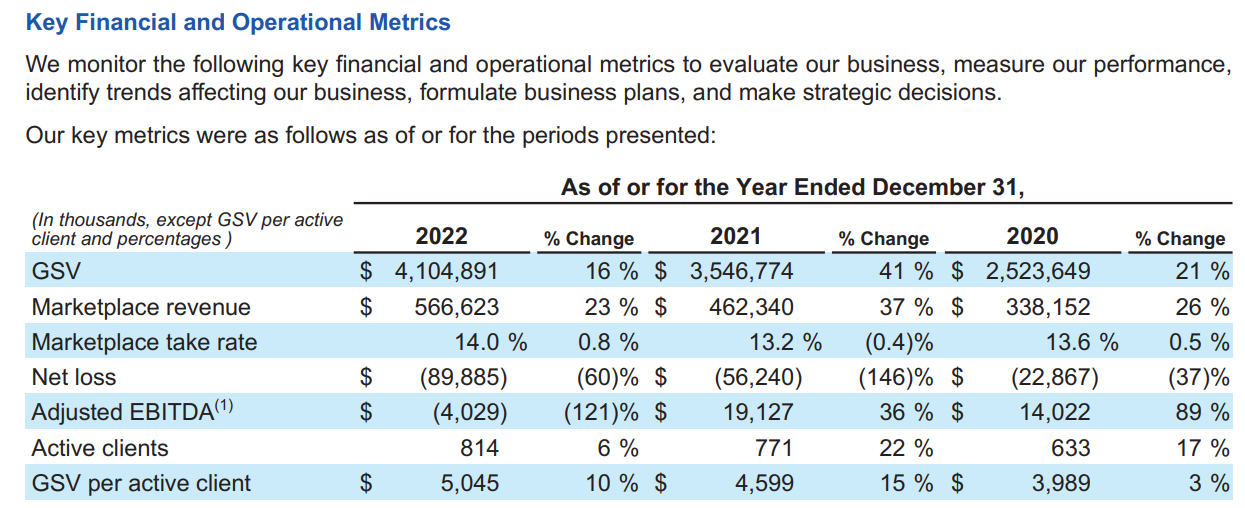
- The company uses GSV as a Business metric.
- The Number of Active clients (814k in 2022) growing 6% from the previous year.
- And The GSV/Active clients which may mean that active client may spend 5k (2022) 
- I won't mension the rest you can check the Annual Report of year 2022.👆  (to the ⭐)

# Revenue by region 
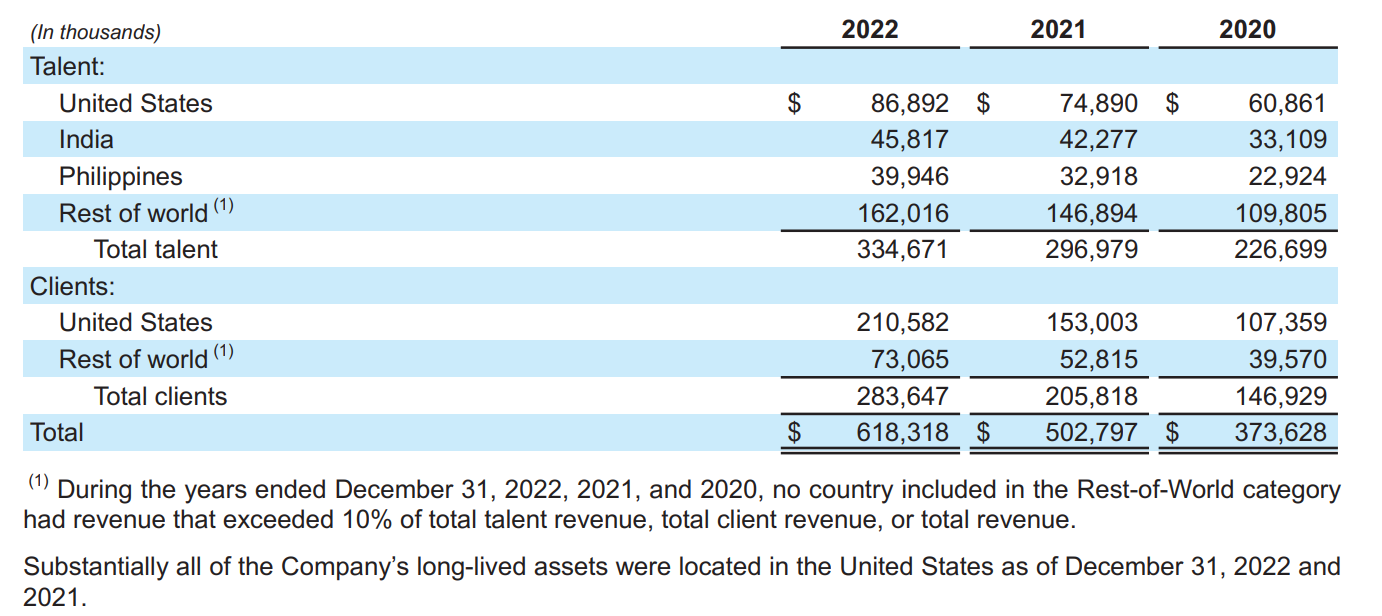
- Clients
  1. USA
- Talents 
  1. USA
  2. India 
  3. Phillippines

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.patheffects import withStroke

<h1 id="0">Table of Content</h1>

1. [Data Validation](#1)
2. What is the most used keywords for the column Job Title ?
3. How the keywords for the Description looks like ?
4. How the keyword of Search_Keyword looks like ?
5. Experience level_demanded distribution ?
6. Distribution of job tags (categories) 
7. Client_Country distribution ?
       7.1. Map of countires
       7.2. Top 10 countries in job count
8. Payment_type distribution ?


- Info about some columns
    - Connects_Num , New_Connects_Num 
    >Monthly FREE Connects
    >Each month, freelancers receive free Connects to help reach out to more clients. Freelancer Basic accounts receive 10 free Connects each month, and Freelancer Plus accounts receive 70 Connects each month (including 10 FREE!).

    >Connects cost $0.15 (USD) each and are sold in bundles or a custom amount of your choice.
    
      - Usage of  Connects
         - Submit proposals
         - Boost your proposal
         - Turn on your availability badge
      - NO CONNECTS ARE NEEDED
         - When a client invites you to bid.
         - When a client sends you an offer.
         - When a client purchases your Project Catalog project.
         - When you send a proposal within an Enterprise Talent Cloud.

Reading the Excel file having the data 
Our dataset 63952 rows × 40 columns

In [24]:
upwork = pd.read_excel('/kaggle/input/upwork-freelance-jobs-60k/Full_Data_Final.xlsx')
upwork

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,...,United States,6.0,12.0,0.000000,0,Fixed-price,2500,NaN,0.0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,...,Canada,4.0,8.0,5.000000,1,Fixed-price,200,NaN,0.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,...,United States,6.0,12.0,5.000000,1,Hourly,NaN,40,40.0,NaN
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,...,Canada,6.0,12.0,4.935536,26,Hourly,NaN,$35.00-$100.00,35.0,100.0
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,...,United States,6.0,12.0,4.942242,12512,Hourly,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63947,Email Marketing Expert,https://www.upwork.com/jobs/Email-span-Marketi...,Expert,"1 to 3 months, Less than 30 hrs/week",Marketing,3 days ago,Set up email accounts and an email system (gma...,https://www.upwork.com/nx/jobs/search/?ontolog...,Email Marketing,Marketing,...,Canada,6.0,12.0,5.000000,1,Hourly,NaN,NaN,0.0,NaN
63948,(Commission Based) Cold Caller Needed,https://www.upwork.com/jobs/Commission-Based-C...,Expert,"More than 6 months, 30+ hrs/week",Marketing,3 days ago,About the role:\n\nWe are seeking a motivated ...,https://www.upwork.com/nx/jobs/search/?ontolog...,Cold Calling,Marketing,...,Singapore,4.0,8.0,4.756932,29,Hourly,NaN,NaN,0.0,NaN
63949,High-Performance *Ecom Email* Copywriter Suppl...,https://www.upwork.com/jobs/High-Performance-E...,Expert,"More than 6 months, 30+ hrs/week",Marketing,3 days ago,We are seeking a talented and motivated Copywr...,https://www.upwork.com/nx/jobs/search/?ontolog...,Email Copywriting,Marketing,...,United States,6.0,12.0,4.666868,42,Hourly,NaN,NaN,0.0,NaN
63950,TikTok profile managment Hungary,https://www.upwork.com/jobs/TikTok-profile-man...,Entry level,"1 to 3 months, Less than 30 hrs/week",Marketing,3 days ago,We are searching for someone who could help us...,https://www.upwork.com/nx/jobs/search/?ontolog...,Social Media Marketing,Social Media Marketing,...,Slovenia,6.0,12.0,0.000000,0,Hourly,NaN,NaN,0.0,NaN


Missing values in the upwork dataset

In [25]:
upwork.isnull().sum()

Job Title                   1
Job_URL                     0
EX_level_demand             0
Time_Limitation         23646
Search_Keyword              0
Posted_from                36
Description                19
Category1_URL_search      444
Category_1                444
highlight               13819
Category2_URL_search     4060
Category_2               4060
Category3_URL_search     8952
Category_3               8952
Category4_URL_search    16406
Category_4              16406
Category5_URL_search    24371
Category_5              24371
Category6_URL_search    32643
Category_6              32643
Category7_URL_search    38758
Category_7              38758
Category8_URL_search    43514
Category_8              43514
Category9_URL_search    47469
Category_9              47469
Applicants_Num              0
Payment_Situation           0
Freelancers_Num           120
Spent($)                 1645
Client_Country            127
Connects_Num                3
New_Connects_Num            3
Rating    

In [9]:
# keeping orginal data the 0 set
upwork0 = upwork.copy()

In [10]:
pd.set_option('display.max_colwidth', None)


In [11]:
pd.reset_option('display.max_colwidth')

alot of links we can drop them 

In [12]:
upwork.iloc[1, :]

Job Title                         Case Study (on-demand delivery startup)
Job_URL                 https://www.upwork.com/jobs/Case-Study-demand-...
EX_level_demand                                              Intermediate
Time_Limitation                                                       NaN
Search_Keyword                                               Data_science
Posted_from                                                 5 minutes ago
Description             Hi,\n\nWould you be able to help me do a case-...
Category1_URL_search    https://www.upwork.com/nx/jobs/search/?ontolog...
Category_1                                             Google Data Studio
highlight                                              Google Data Studio
Category2_URL_search    https://www.upwork.com/nx/jobs/search/?ontolog...
Category_2                                                            SQL
Category3_URL_search    https://www.upwork.com/nx/jobs/search/?ontolog...
Category_3                            

Extracting the URL columns names to drop 

In [13]:
url_cols = []
for col in upwork.columns:
    splited = col.split('_')
    try:
        if splited[1] == "URL":
            url_cols.append(col)
    except:
        continue
url_cols

['Job_URL',
 'Category1_URL_search',
 'Category2_URL_search',
 'Category3_URL_search',
 'Category4_URL_search',
 'Category5_URL_search',
 'Category6_URL_search',
 'Category7_URL_search',
 'Category8_URL_search',
 'Category9_URL_search']

In [28]:
upwork.drop(columns=url_cols, inplace=True)

In [29]:
upwork.iloc[np.random.randint(0, upwork.shape[0]), :]

Job Title                                               GSAP Animation
EX_level_demand                                           Intermediate
Time_Limitation                                                    NaN
Search_Keyword                                               Developer
Posted_from                                                 2 days ago
Description          Hello, I need the following animation on the o...
Category_1                                                        GSAP
highlight                                                          NaN
Category_2                                                  JavaScript
Category_3                                                   WordPress
Category_4                                                         NaN
Category_5                                                         NaN
Category_6                                                         NaN
Category_7                                                         NaN
Catego

In [30]:
upwork.isnull().sum()

Job Title                1
EX_level_demand          0
Time_Limitation      23646
Search_Keyword           0
Posted_from             36
Description             19
Category_1             444
highlight            13819
Category_2            4060
Category_3            8952
Category_4           16406
Category_5           24371
Category_6           32643
Category_7           38758
Category_8           43514
Category_9           47469
Applicants_Num           0
Payment_Situation        0
Freelancers_Num        120
Spent($)              1645
Client_Country         127
Connects_Num             3
New_Connects_Num         3
Rating                 444
Feedback_Num             0
Payment_type             0
Job_Cost             43832
Hourly_Rate          37382
Start_rate               0
End_rate             37989
dtype: int64

## What is the most used keywords for the column Job Title ?

In [38]:
def draw_wordcloud(colName, df=upwork):
    text_data = " ".join(df[colName].dropna())

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5), dpi=150)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

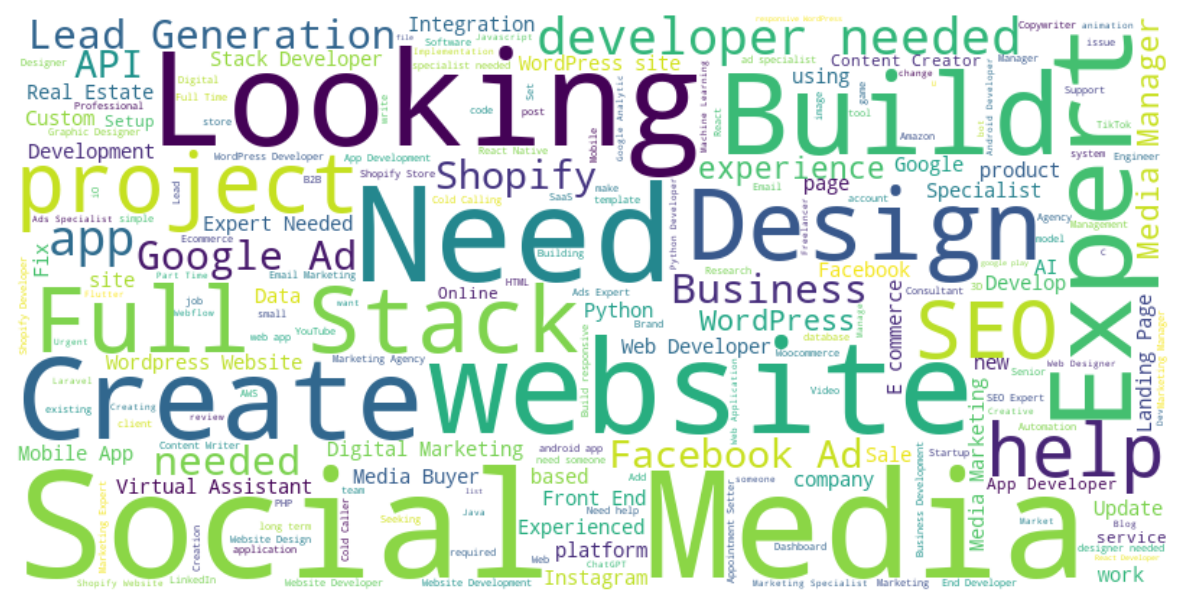

In [39]:
draw_wordcloud("Job Title")

## How the keywords for the Description looks like ?

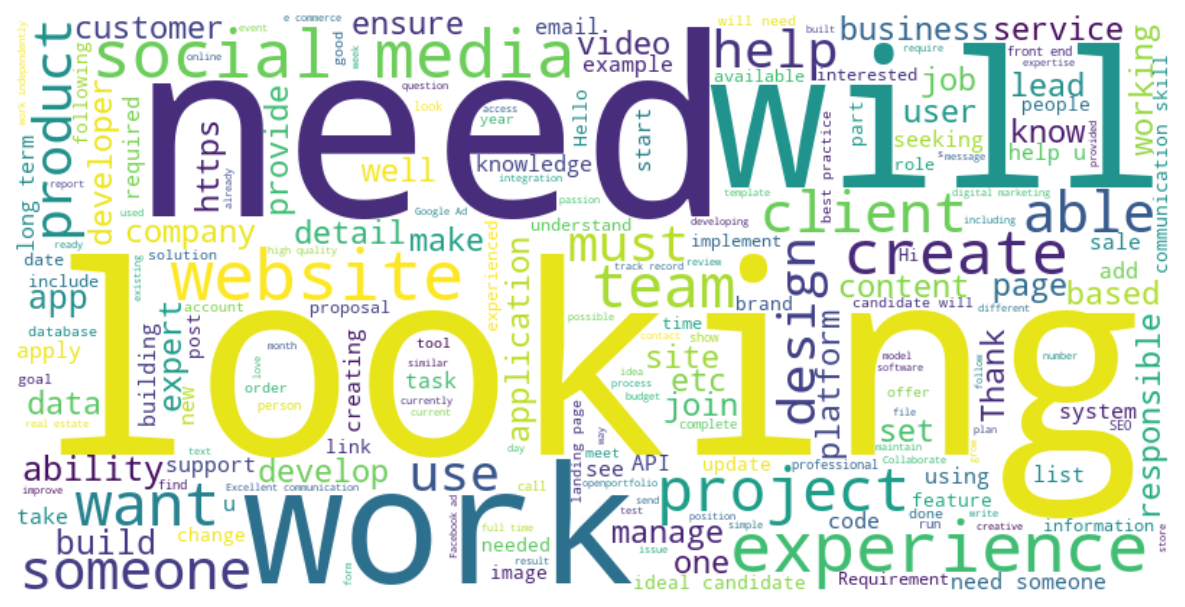

In [40]:
draw_wordcloud("Description")

## How the keyword of Search_Keyword looks like ?

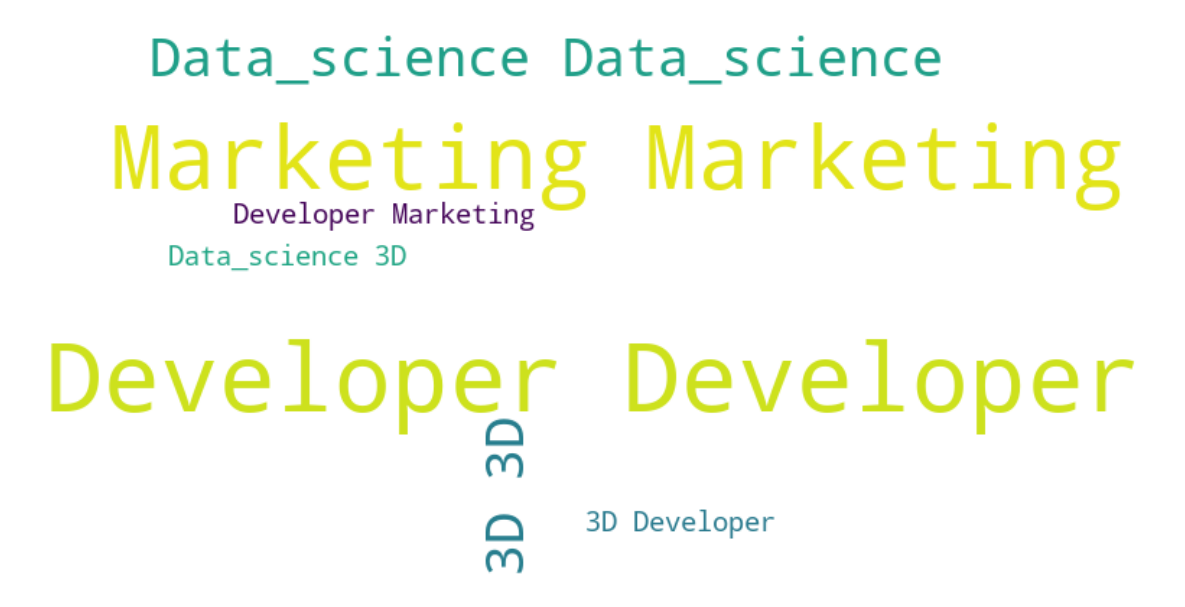

In [47]:
draw_wordcloud("Search_Keyword")

In [48]:
# we can see it has low cardinallity values few search keywords
# most search keywords are Developer then Marketing
upwork["Search_Keyword"].value_counts()

Search_Keyword
Developer       29221
Marketing       24747
3D               4995
Data_science     4989
Name: count, dtype: int64

## Experience level_demanded distribution ?

In [51]:
# we have runied values 
# let's set them to "Intermediate"
upwork["EX_level_demand"].value_counts()

EX_level_demand
Intermediate                                             33987
Expert                                                   23694
Entry level                                               6235
Est. Time:  Less than 1 month, not_sure                     22
Est. Time:  1 to 3 months, not_sure                          6
Est. Budget:                                                 6
Est. Time:  More than 6 months, Less than 30 hrs/week        1
Est. Time:  3 to 6 months, 30+ hrs/week                      1
Name: count, dtype: int64

Replacing all the values starts with "Est" with "Intermediate" 

In [59]:
upwork.loc[upwork["EX_level_demand"].str.startswith("Est"), ["EX_level_demand"]] = "Intermediate"
upwork["EX_level_demand"].value_counts()

EX_level_demand
Intermediate    34023
Expert          23694
Entry level      6235
Name: count, dtype: int64

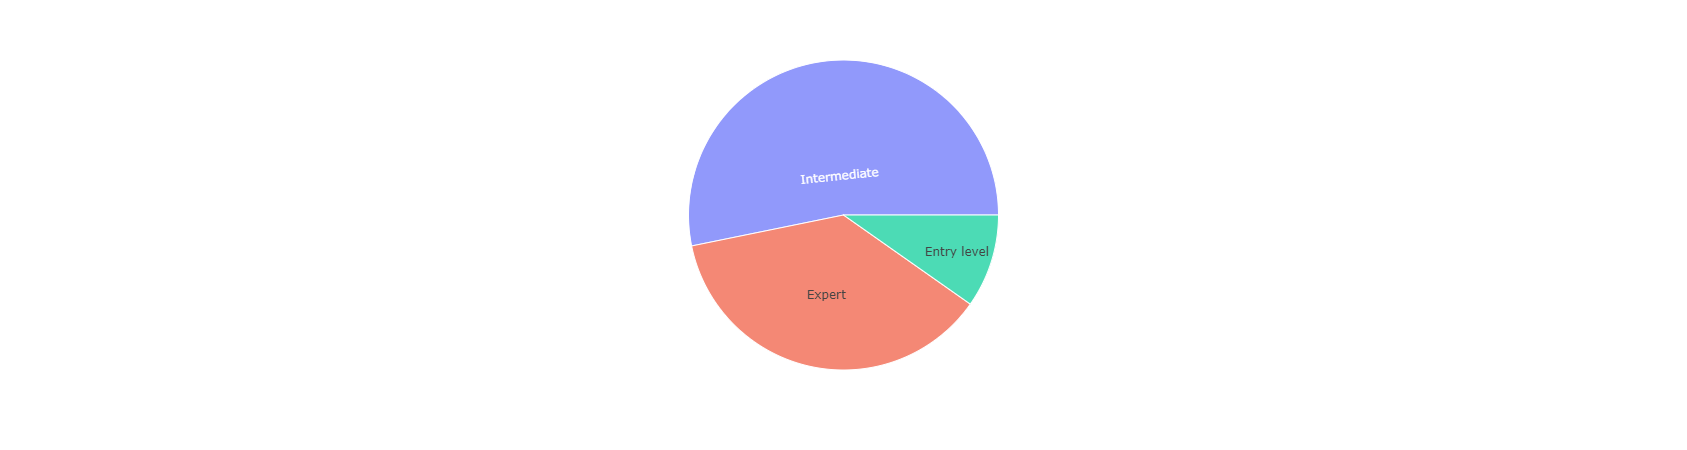

In [68]:
px.sunburst(data_frame=upwork, path=["EX_level_demand"])

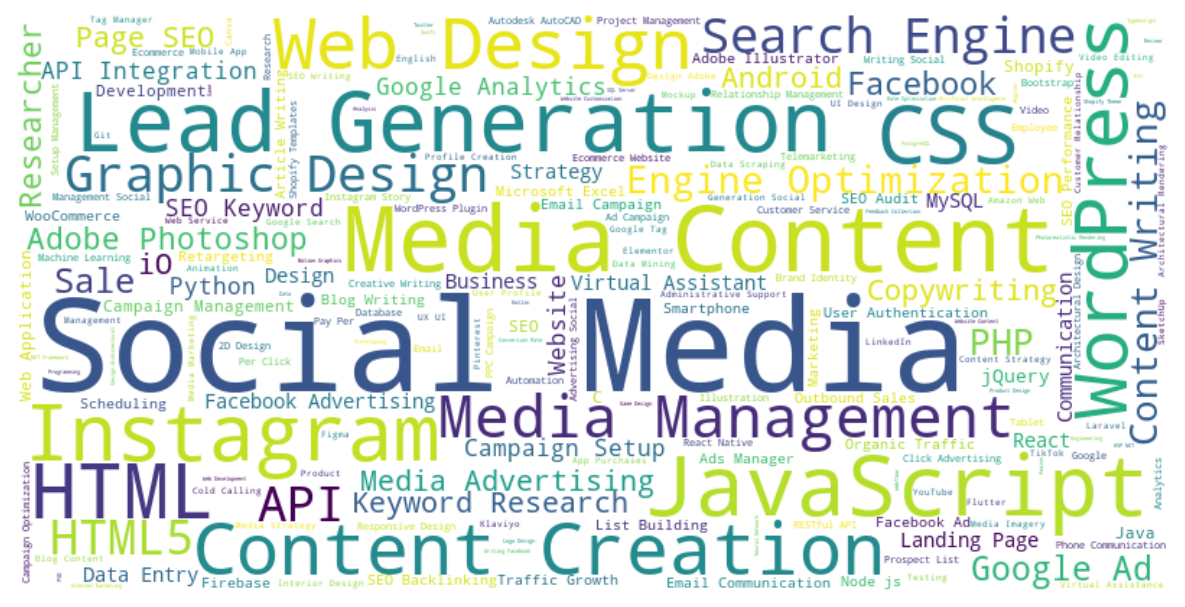

In [64]:
draw_wordcloud("Category_9")

creating a list of category columns (like tags for the job) 

In [65]:
catcols = []
for col in upwork.columns:
    if col.startswith("Category"):
        catcols.append(col)

catcols

['Category_1',
 'Category_2',
 'Category_3',
 'Category_4',
 'Category_5',
 'Category_6',
 'Category_7',
 'Category_8',
 'Category_9']

Built a wordcloud to represent how the categories combined from category1...category9 (tags) appear in the jobs 

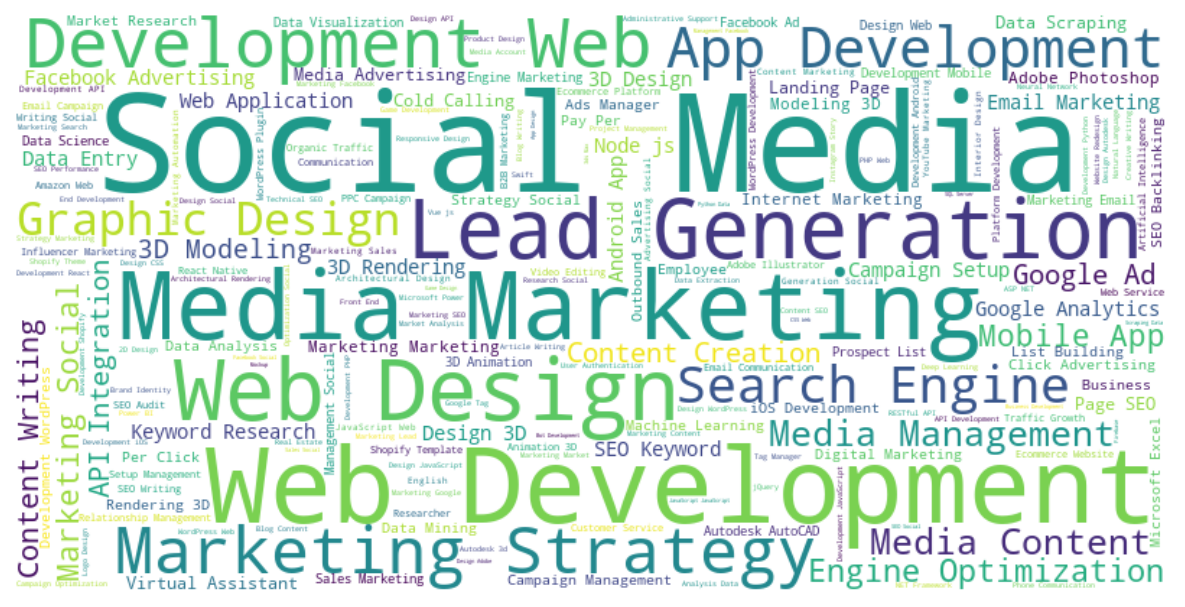

In [67]:
text_data = " "
for col in catcols:
    text_data += " ".join(upwork[col].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5), dpi=150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
upwork["Category_1"].value_counts()

Category_1
Web Development            8733
Social Media Marketing     4783
Marketing Strategy         1702
Mobile App Development     1331
3D Modeling                1228
                           ... 
Cartoon Art                   1
Computer                      1
WeChat                        1
Finite Element Analysis       1
DeepCrawl                     1
Name: count, Length: 2239, dtype: int64

# Client_Country distribution ?

In [70]:
upwork["Client_Country"].value_counts().reset_index()

,Client_Country,count
0,United States,26699
1,India,5734
2,United Kingdom,4353
3,Canada,3270
4,Australia,2783
...,...,...
182,Saint Kitts and Nevis,1
183,Grenada,1
184,Cook Islands,1
185,Sierra Leone,1


In [114]:
# pd.reset_option('display.max_row')
upwork.Client_Country.unique()

array(['United States', 'Canada', 'Australia', 'Poland', 'Pakistan',
       'Bolivia', 'Germany', 'Israel', 'India', 'Turkey',
       'United Kingdom', 'Finland', 'France', 'Nigeria', 'Switzerland',
       'Netherlands', 'China', 'Ecuador', 'Brazil', 'Hong Kong', 'Italy',
       'Portugal', 'Romania', 'Nepal', 'United Arab Emirates', 'Ukraine',
       'Bangladesh', 'Argentina', 'Belgium', 'Egypt', 'South Africa',
       'Bahrain', 'Spain', 'Indonesia', 'Kenya', 'Hungary', 'Singapore',
       'New Zealand', 'Seychelles', 'Thailand', 'Lebanon', nan, 'Taiwan',
       'Philippines', 'Malaysia', 'Mexico', 'Sweden', 'Ireland',
       'Saudi Arabia', 'Puerto Rico', 'Latvia', 'Czech Republic',
       'Georgia', 'Denmark', 'South Korea', 'Japan', 'Colombia', 'Cyprus',
       'Qatar', 'Slovenia', 'Guyana', 'Iceland', 'Estonia', 'Tanzania',
       'Croatia', 'Guatemala', 'Bulgaria', 'Tunisia', 'Kuwait', 'Jordan',
       'Trinidad and Tobago', 'Macedonia', 'Albania', 'Norway',
       'San Marino',

In [115]:
country_name_to_code = {
    'United States': 'US',
    'Canada': 'CA',
    'Australia': 'AU',
    'Poland': 'PL',
    'Pakistan': 'PK',
    'Bolivia': 'BO',
    'Germany': 'DE',
    'Israel': 'IL',
    'India': 'IN',
    'Turkey': 'TR',
    'United Kingdom': 'GB',
    'Finland': 'FI',
    'France': 'FR',
    'Nigeria': 'NG',
    'Switzerland': 'CH',
    'Netherlands': 'NL',
    'China': 'CN',
    'Ecuador': 'EC',
    'Brazil': 'BR',
    'Hong Kong': 'HK',
    'Italy': 'IT',
    'Portugal': 'PT',
    'Romania': 'RO',
    'Nepal': 'NP',
    'United Arab Emirates': 'AE',
    'Ukraine': 'UA',
    'Bangladesh': 'BD',
    'Argentina': 'AR',
    'Belgium': 'BE',
    'Egypt': 'EG',
    'South Africa': 'ZA',
    'Bahrain': 'BH',
    'Spain': 'ES',
    'Indonesia': 'ID',
    'Kenya': 'KE',
    'Hungary': 'HU',
    'Singapore': 'SG',
    'New Zealand': 'NZ',
    'Seychelles': 'SC',
    'Thailand': 'TH',
    'Lebanon': 'LB',
    'Taiwan': 'TW',
    'Philippines': 'PH',
    'Malaysia': 'MY',
    'Mexico': 'MX',
    'Sweden': 'SE',
    'Ireland': 'IE',
    'Saudi Arabia': 'SA',
    'Puerto Rico': 'PR',
    'Latvia': 'LV',
    'Czech Republic': 'CZ',
    'Georgia': 'GE',
    'Denmark': 'DK',
    'South Korea': 'KR',
    'Japan': 'JP',
    'Colombia': 'CO',
    'Cyprus': 'CY',
    'Qatar': 'QA',
    'Slovenia': 'SI',
    'Guyana': 'GY',
    'Iceland': 'IS',
    'Estonia': 'EE',
    'Tanzania': 'TZ',
    'Croatia': 'HR',
    'Guatemala': 'GT',
    'Bulgaria': 'BG',
    'Tunisia': 'TN',
    'Kuwait': 'KW',
    'Jordan': 'JO',
    'Trinidad and Tobago': 'TT',
    'Macedonia': 'MK',
    'Albania': 'AL',
    'Norway': 'NO',
    'San Marino': 'SM',
    'Oman': 'OM',
    'Greece': 'GR',
    'Kazakhstan': 'KZ',
    'Venezuela': 'VE',
    'Uzbekistan': 'UZ',
    'Peru': 'PE',
    'Austria': 'AT',
    'Ethiopia': 'ET',
    'Sri Lanka': 'LK',
    'Vietnam': 'VN',
    'Serbia': 'RS',
    'Chile': 'CL',
    'Luxembourg': 'LU',
    'Malta': 'MT',
    'Lithuania': 'LT',
    'Panama': 'PA',
    'Morocco': 'MA',
    'Yemen': 'YE',
    'Azerbaijan': 'AZ',
    'Armenia': 'AM',
    'Dominican Republic': 'DO',
    'Uruguay': 'UY',
    'American Samoa': 'AS',
    'Togo': 'TG',
    'Moldova': 'MD',
    'Maldives': 'MV',
    'Jamaica': 'JM',
    'Liechtenstein': 'LI',
    'Slovakia': 'SK',
    'Ghana': 'GH',
    'Costa Rica': 'CR',
    'Congo, the Democratic Republic of the': 'CD',
    'Honduras': 'HN',
    'Belarus': 'BY',
    'Cayman Islands': 'KY',
    'Haiti': 'HT',
    'Guam': 'GU',
    'Aland Islands': 'AX',
    'Kyrgyzstan': 'KG',
    'Zimbabwe': 'ZW',
    'Algeria': 'DZ',
    'Grenada': 'GD',
    'Uganda': 'UG',
    'Netherlands Antilles': 'AN',
    'New Caledonia': 'NC',
    'Bosnia and Herzegovina': 'BA',
    'Namibia': 'NA',
    'Rwanda': 'RW',
    'Russia': 'RU',
    'Mauritius': 'MU',
    'Monaco': 'MC',
    'El Salvador': 'SV',
    'Macao': 'MO',
    'Bahamas': 'BS',
    'Mongolia': 'MN',
    'Aruba': 'AW',
    'Cameroon': 'CM',
    'Palestinian Territories': 'PS',
    'Cambodia': 'KH',
    'Botswana': 'BW',
    'Isle of Man': 'IM',
    'Mozambique': 'MZ',
    'Burkina Faso': 'BF',
    'Cook Islands': 'CK',
    'Angola': 'AO',
    'Gibraltar': 'GI',
    "Cote d'Ivoire": 'CI',
    'Bermuda': 'BM',
    'Micronesia, Federated States of': 'FM',
    'Saint Vincent and the Grenadines': 'VC',
    'Somalia': 'SO',
    'Barbados': 'BB',
    'Guinea': 'GN',
    'Saint Martin (French part)': 'MF',
    'Suriname': 'SR',
    'Turkmenistan': 'TM',
    'Gambia': 'GM',
    'Curacao': 'CW',
    'Swaziland': 'SZ',
    'Jersey': 'JE',
    'Guadeloupe': 'GP',
    'United States Virgin Islands': 'VI',
    'Mali': 'ML',
    'Saint Lucia': 'LC',
    'Sierra Leone': 'SL',
    'Andorra': 'AD',
    'British Virgin Islands': 'VG',
    'Benin': 'BJ',
    'Montenegro': 'ME',
    'Paraguay': 'PY',
    'Nicaragua': 'NI',
    'Senegal': 'SN',
    'United States Minor Outlying Islands': 'UM',
    'Saint Kitts and Nevis': 'KN',
    'Anguilla': 'AI',
    'Belize': 'BZ',
    'Greenland': 'GL',
    'Myanmar': 'MM',
    'Antigua and Barbuda': 'AG',
    'Tajikistan': 'TJ',
    'Papua New Guinea': 'PG',
    'Zambia': 'ZM',
    'British Indian Ocean Territory': 'IO',
    'Samoa': 'WS',
    'Northern Mariana Islands': 'MP',
    'Sint Maarten (Dutch part)': 'SX',
    'Laos': 'LA',
    'Guernsey': 'GG',
    'Brunei Darussalam': 'BN',
    'Turks and Caicos Islands': 'TC',
    'Malawi': 'MW',
    'Fiji': 'FJ',
    'Niger': 'NE',
}


Mapping countries names to iso codes abbreviation of 2 letters

In [116]:
upwork["country_code"] = upwork["Client_Country"].map(country_name_to_code)

In [123]:
upwork.Client_Country.isnull().sum()

127

In [140]:
countries_to_map = upwork["country_code"].value_counts().reset_index()
countries_to_map

,country_code,count
0,US,26699
1,IN,5734
2,GB,4353
3,CA,3270
4,AU,2783
...,...,...
182,KN,1
183,GD,1
184,CK,1
185,SL,1


In [141]:
code_to_country = {v: k for k, v in country_name_to_code.items()}
countries_to_map["countries"] = countries_to_map["country_code"].map(code_to_country)
countries_to_map

,country_code,count,countries
0,US,26699,United States
1,IN,5734,India
2,GB,4353,United Kingdom
3,CA,3270,Canada
4,AU,2783,Australia
...,...,...,...
182,KN,1,Saint Kitts and Nevis
183,GD,1,Grenada
184,CK,1,Cook Islands
185,SL,1,Sierra Leone


## Map of countires

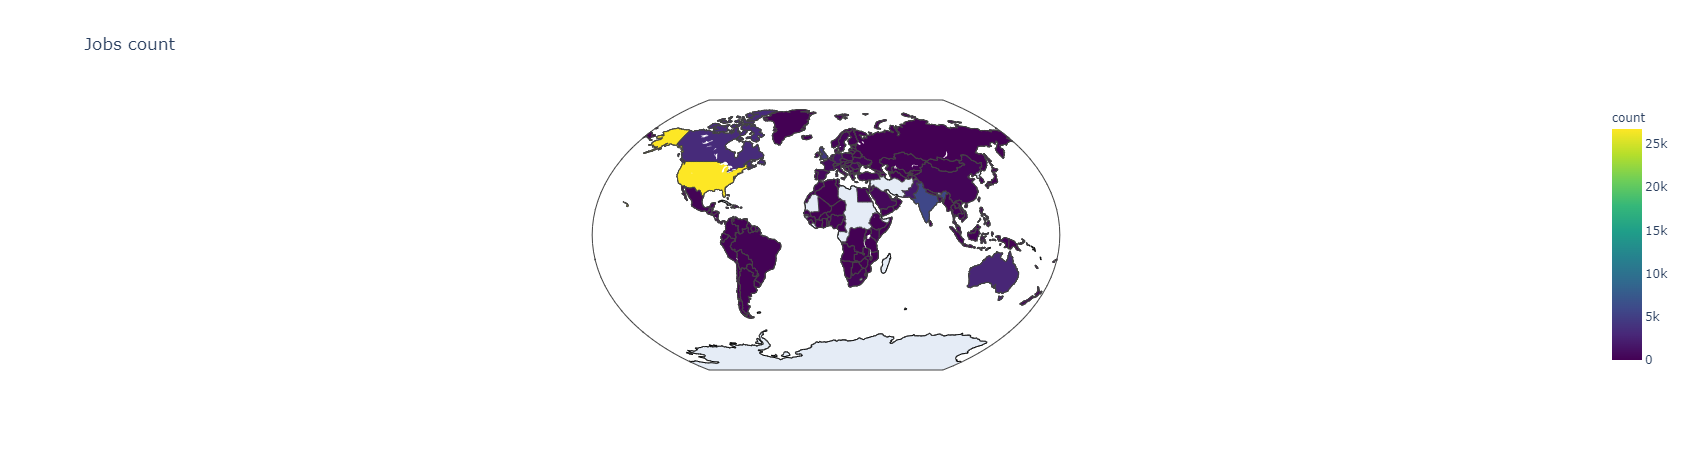

In [168]:
# Create a choropleth map using Plotly Express
fig = px.choropleth(countries_to_map, 
                    locations="countries",
                    color= "count",
                    hover_name="countries",  
                    color_continuous_scale="viridis",  
                    locationmode="country names",
                    title="Jobs count")

fig.update_geos(projection_type="kavrayskiy7", showcoastlines=True, coastlinecolor="Black")

# Show the map
fig.show()


## Top 10 countries in job count

In [174]:
top10countries = countries_to_map.sort_values(by="count", ascending=False).iloc[:10, :]
top10countries

,country_code,count,countries
0,US,26699,United States
1,IN,5734,India
2,GB,4353,United Kingdom
3,CA,3270,Canada
4,AU,2783,Australia
5,PK,1841,Pakistan
6,DE,1289,Germany
7,AE,1148,United Arab Emirates
8,NL,882,Netherlands
9,FR,764,France


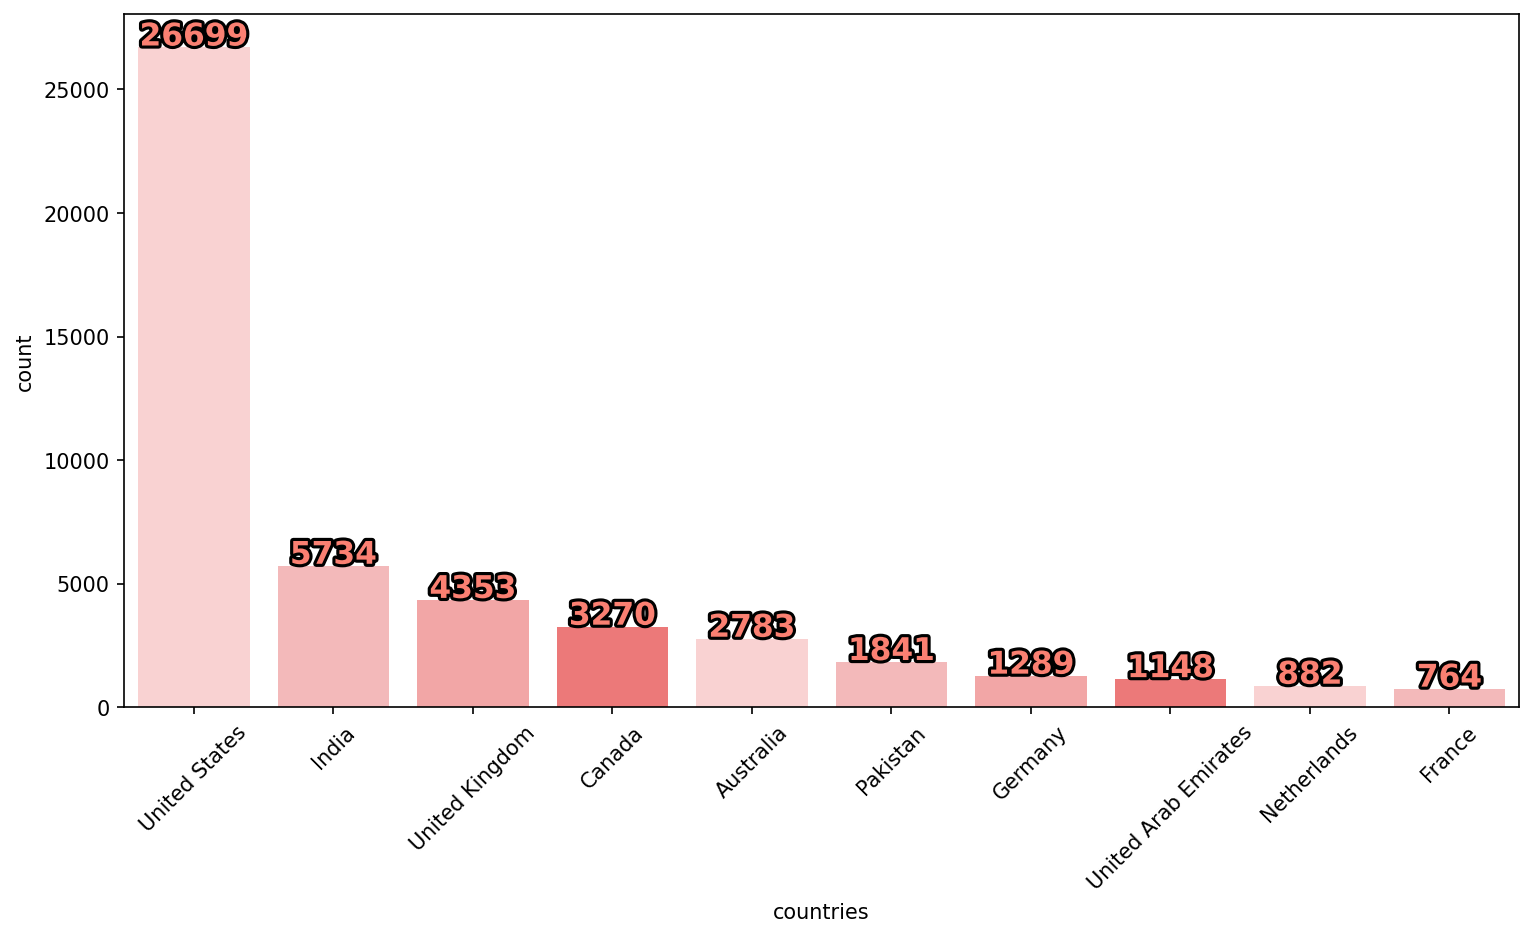

In [201]:
plt.figure(figsize=(12, 6), dpi=150)

custom_colors = ['#ffcccc','#fcb0b1','#ff9999','#ff6666']
ax = sns.barplot(data=top10countries, x="countries", y="count", palette=custom_colors) 
plt.xticks(rotation=45)

# Define the outline effect
outline_effect = [withStroke(linewidth=3, foreground='Black')]

for idx, p in enumerate(ax.patches):
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=15, fontweight="bold", path_effects=outline_effect, color='salmon', xytext=(0, 5), textcoords='offset points')

plt.show()

## Payment_type distribution ?

In [206]:
upwork.Payment_type.value_counts().reset_index()

,Payment_type,count
0,Hourly,40336
1,Fixed-price,23616
